- 第5章 支持向量机
>- 支持向量机（简称SVM）是一个功能强大并且全面的机器学习模型，
>- 它能够执行线性或非线性分类、回归，甚至是异常值检测任务。
>- 它是机器学习领域最受欢迎的模型之一，任何对机器学习感兴趣的人都应该在工具箱中配备一个。
>- SVM特别适用于中小型复杂数据集的分类

# 线性SVM分类

## SVM概念

- 将SVM分类器视为在类别之间拟合可能的最宽的街道（平行的虚线所示） 。 因此这也叫作大间隔分类（large margin classification）

![](img/5-1.png)

- 请注意，在街道以外的地方增加更多训练实例，不会对决策边界产生影响：也就是说它完全由位于街道边缘的实例所决定（或者称之为“支持”）。这些实例被称为支持向量

- SVM对特征的缩放非常敏感，如图5-2所示，在左图中，垂直刻度比水平刻度大得多，因此可能的最宽的街道接近于水平。在特征缩放（例如使用Scikit-Learn的StandardScaler）后，决策边界看起来好很多（见右图）。

![](img/5-2.png)

### 软间隔分类

#### 硬间隔分类
- 如果我们严格地让所有实例都不在街道上， 并且位于正确的一边，这就是硬间隔分类。
- 硬间隔分类有两个主要问题，
- 首先，它只在数据是线性可分离的时候才有效；
- 其次，它对异常值非常敏感。

![](img/5-3.png)

#### 软间隔分类
- 要避免这些问题， 最好使用更灵活的模型。
- 目标是尽可能在保持街道宽阔和限制间隔违例（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡，这就是软间隔分类。
- 在Scikit-Learn的SVM类中，可以通过超参数C来控制这个平衡：C值越小，则街道越宽，但是间隔违例也会越多
>C所代表的是惩罚因子

![](img/5-4.png)

### 代码实例

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]    # 只取第三第四个特征
y = (iris['target'] == 2)      # 判断是否为第三种花

In [5]:
svm_clf = Pipeline((
    ('scaler', StandardScaler()),     # 标准化
    ('linear_svc', LinearSVC(C=1, loss='hinge')),   # 线性svm模型
))

In [6]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5,1.7]])

array([ True])

- LinearSVC类会对偏置项进行正则化， 所以你需要先减去平均值， 使训练集集中。
- 如果使用StandardScaler会自动进行这一步。
- 此外，请确保超参数loss设置为"hinge"，因为它不是默认值。
- 最后，为了获得更好的性能，还应该将超参数dual设置为False， 
- 除非特征数量比训练实例还多（本章后文将会讨论）

# 非线性SVM分类

## 引入
- 虽然在许多情况下，线性SVM分类器是有效的，并且通常出人意料的好，
- 但是，有很多数据集远不是线性可分离的。
- 处理非线性数据集的方法之一是添加更多特征，
- 比如多项式特征（如第4章所述），某些情况下，这可能导致数据集变得线性可分离。

![](img/5-5.png)

## 代码示例

In [15]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [51]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

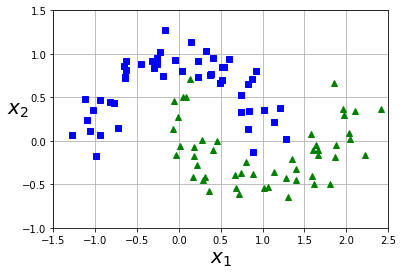

In [64]:
import matplotlib.pyplot as plt
def plot_datasets(X, y, axse):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.xlim(axse[0], axse[1])
    plt.ylim(axse[2], axse[3])
plot_datasets(X, y, [-1.5, 2.5, -1.0, 1.5])

In [54]:
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),  # 添加多项式特征
    ('sacler', StandardScaler()),       # 标准化
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42)),  # svm模型
))
polynomial_svm_clf.fit(X, y)

C:\Users\Davion\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('sacler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [59]:
polynomial_svm_clf.predict([[1,1]])

array([0], dtype=int64)

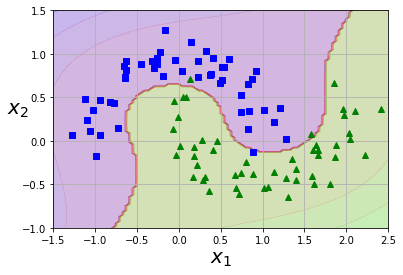

In [65]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])

## 多项式核

- 添加多项式特征实现起来非常简单， 并且对所有的机器学习算法（不只是SVM） 都非常有效。
- 但问题是， 如果多项式太低阶， 处理不了非常复杂的数据集，
- 而高阶则会创造出大量的特征，导致模型变得太慢。

- 有一个魔术般的数学技巧可以应用，这就是核技巧。
- 它产生的结果就跟添加了许多多项式特征，
- 甚至是非常高阶的多项式特征一样，但实际上并不需要真的添加。
- 因为实际没有添加任何特征， 所以也就不存在数量爆炸的组合特征了。

### 多项式核

In [61]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)),
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [70]:
poly_kernel_svm_clf_2 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5)),
))
poly_kernel_svm_clf_2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, 'degree=10, coef0=100, C=5')

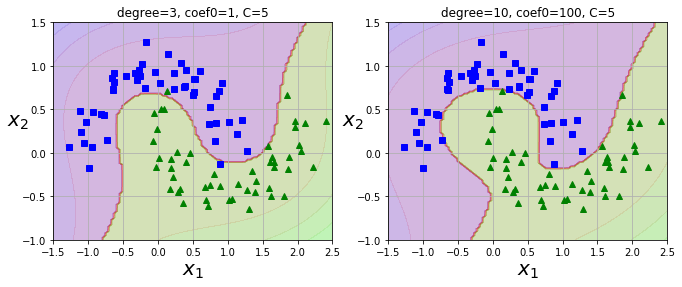

In [80]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('degree=3, coef0=1, C=5')

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf_2, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('degree=10, coef0=100, C=5')

<small>超参数coef0控制的是模型受高阶多项式还是低阶多项式影响的程度</small>

### 高斯核

- 解决非线性问题的另一种技术是添加相似特征。
- 这些特征经过相似函数计算得出，
- 相似函数可以测量每个实例与一个特定地标（landmark）之间的相似度。 

#### 高斯RBF
$$ \phi\gamma(x, l)=exp(-\gamma||x-l||^2) $$

- 这是一个从0（离地标差得非常远） 到1（跟地标一样） 变化的钟形函数。
- 现在我们准备计算新特征。 
- 例如， 我们看实例x1=-1： 它与第一个地标的距离为1， 与第二个地标的距离为2。
- 因此它的新特征为x2=eps（-0.3×12） ≈0.74， x3=eps（-0.3×22） ≈0.30。
- 图5-8的右图显示了转换后的数据集（去除了原始特征），
- 现在你可以看出， 数据呈线性可分离的了。

![](img/5-8.png)

#### 高斯RBF核函数

In [85]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

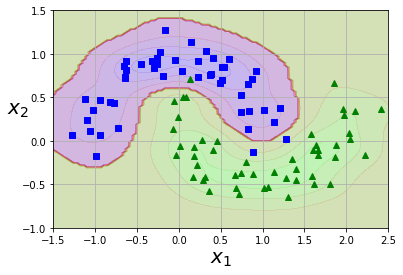

In [86]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])

In [88]:
rbf_kernel_svm_clf_1 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=0.001))
))
rbf_kernel_svm_clf_1.fit(X, y)

rbf_kernel_svm_clf_2 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=1000))
))
rbf_kernel_svm_clf_2.fit(X, y)

rbf_kernel_svm_clf_3 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
))
rbf_kernel_svm_clf_3.fit(X, y)

rbf_kernel_svm_clf_4 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=1000))
))
rbf_kernel_svm_clf_4.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Text(0.5, 1.0, 'gamma=5, C=1000')

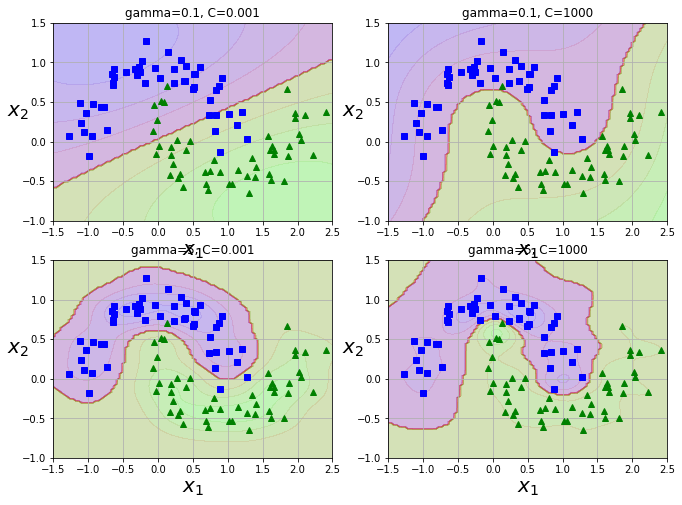

In [107]:
plt.figure(figsize=(11, 8))

plt.subplot(221)
plot_predictions(rbf_kernel_svm_clf_1, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('gamma=0.1, C=0.001')

plt.subplot(222)
plot_predictions(rbf_kernel_svm_clf_2, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('gamma=0.1, C=1000')

plt.subplot(223)
plot_predictions(rbf_kernel_svm_clf_3, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('gamma=5, C=0.001')

plt.subplot(224)
plot_predictions(rbf_kernel_svm_clf_4, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('gamma=5, C=1000')

- 有这么多的核函数， 该如何决定使用哪一个呢？
- 有一个经验法则是，
- 永远先从线性核函数开始尝试（要记住， LinearSVC比SVC（kernel="linear"） 快得多），特别是训练集非常大或特征非常多的时候。
- 如果训练集不太大， 你可以试试高斯RBF核， 大多数情况下它都非常好用。
- 如果你还有多余的时间和计算能力， 你可以使用交叉验证和网格搜索来尝试一些其他的核函数，
- 特别是那些专门针对你的数据集数据结构的核函数。

## 计算复杂度
![](img/5-1-1.png)

# SVM回归

## 概念
- 正如前面提到的，SVM算法非常全面：它不仅支持线性和非线性分类，而且还支持线性和非线性回归。
- 诀窍在于将目标反转一下：
- 不再是尝试拟合两个类别之间可能的最宽的街道的同时限制间隔违例，
- SVM回归要做的是让尽可能多的实例位于街道上， 同时限制间隔违例（也就是不在街道上的实例）。街道的宽度由超参数ε控制。
- 图5-10显示了用随机线性数据训练的两个线性SVM回归模型， 一个间隔较大（ε＝1.5） ， 另一个间隔较小（ε＝0.5）

![](img/5-10.png)

- 在间隔内添加更多的实例不会影响模型的预测， 所以这个模型被称为ε不敏感。

In [171]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [172]:
# 这里生成左边的图
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)

In [173]:
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [165]:
def plot_svm_reg(model, xlim):
    X_new = np.linspace(xlim[0], xlim[1], 100).reshape(100, -1)
    y_new_pred = svm_poly_reg.predict(X_new)
    plt.plot(X, y, '.')
    plt.plot(X_new, y_new_pred, 'k-')
    plt.plot(X_new, y_new_pred+svm_poly_reg.epsilon, '--')
    plt.plot(X_new, y_new_pred-svm_poly_reg.epsilon, '--')

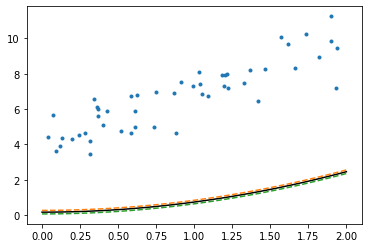

In [174]:
plot_svm_reg(svm_reg, [0,2])

## 代码示例

In [175]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [176]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

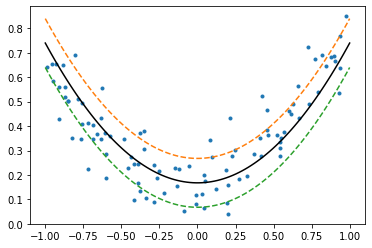

In [178]:
plot_svm_reg(svm_poly_reg, [-1, 1])

# 工作原理

## 决策函数和预测

- 线性SVM分类器通过简单地计算决策函数$w^tx+b=w_1x_1+……+w_nx_n$来预测新实例x的分类。如果结果为正，则预测类别是正类（1），不然则预测其为负类（0） 

- 线性SVM分类器预测
$$ \hat{y}=\begin{cases}
0 & w^tx+b<0\\
1 & w^tx+b>=0
\end{cases} $$

![](img/5-12.png)

- 数据集包含两个特征（花瓣宽度和长度），所以是一个二维平面。决策边界是决策函数等于0的点的合：它是两个平面的交集，也就是一条直线（加粗实线所示）
- 虚线表示决策函数等于1或-1的点：它们互相平行，并且与决策边界的距离相等，从而形成了一个间隔。训练线性SVM分类器即意味着找到w和b的值，从而使这个间隔尽可能宽的同时，避免（硬间隔）或是限制（软间隔）间隔违例。

## 训练目标

- 思考一下决策函数的斜率：
- 它等于权重向量的范数， 即||w||。
- 如果我们将斜率除以2， 那么决策函数等于±1的点也将变得离决策函数两倍远。
- 也就是说， 将斜率除以2， 将会使间隔乘以2。
- 也许2D图更容易将其可视化，权重向量w越小， 间隔越大

(-2, 2)

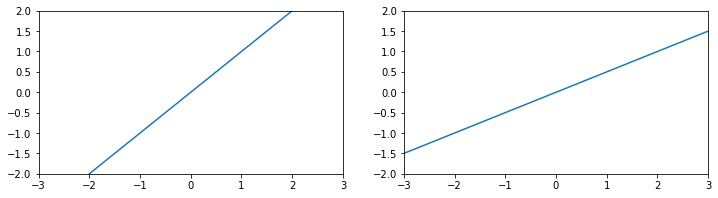

In [186]:
plt.figure(figsize=(12,3))
plt.subplot(121)
X_temp = np.linspace(-3, 3, 1000)
plt.plot(X_temp, 1 * X_temp)
plt.xlim(-3,3)
plt.ylim(-2,2)

plt.subplot(122)
X_temp = np.linspace(-3, 3, 1000)
plt.plot(X_temp, 0.5 * X_temp)
plt.xlim(-3,3)
plt.ylim(-2,2)

### 硬间隔线性SVM分类器的目标

![](img/5-12-1.png)

### 软间隔线性SVM分类器目标
要达到软间隔的目标， 我们需要为每个实例引入一个松弛变量
ζ（i） ≥0

![](img/5-12-2.png)

## 二次规划
![](img/5-12-3.png)